# Анализ данных на Python

## Библиотека `Pandas`
#### <i>Малкова Ксения, Преподаватель ФКН НИУ ВШЭ, kemalkova@hse.ru</i>*

*Почты еще нет, но она в процессе создания :)

Содержание

1. [Общая информация](#part1)
2. [Датафреймы библиотека `Pandas`](#part2)
    1. [Создание собственного датафрейма](#part2.1)
    2. [Работа с готовыми таблицами](#part2.1)
3. [Типы данных](#part3)
4. [Фильтрация данных](#part4)
5. [Сортировка данных](#part5)

### Информация  <a name="part1"></a>

**Формула оценивания**: $$\min(0.05\times\text{Активность}+0.05\times\text{Домашние работы}+0.1\times\text{Тесты}+0.15\times\text{СР}+0.2\times\text{КР}+0.2\times\text{Экзамен}+0.25\times\text{Проект}, 8)$$

#### [Ссылка](https://edu.hse.ru/course/view.php?id=198011) на курс по подготовке к **Независимому экзамену**:

<p align="center">
  <img src="../../курс_подготовка_НЭ.png" alt="My Image" width="300"/>
</p>

# **Датафреймы. Библиотека** `Pandas`  <a name="part2"></a>

`Pandas` - библиотека для работы с табличными данными в питоне.

Позволяет:
- работать с датасетами большого размера
- преобразовывать данные
- считать статистические показатели
- базово визуализировать данные

Является лёгкой и интуитивной в освоении. У библиотеки отличная документация, где подробно расписан весь её функционал.
Давайте начнём работу с `pandas`: если вы работаете не в Anaconda, но хотите самостоятельно идти по коду вместе со мной, то необходимо прописать следующую команду в ячейке кода:

In [1]:
# pip install pandas

Если `pandas` уже установлен, нам необходимо импортировать его в файл, с которым мы работаем:

In [2]:
# импортировали библиотеку pandas и назвали ее pd
import pandas as pd

## **Базовая работа с собственными таблицами** <a name="part2.1"></a>

### 1. Создание собственного датафрейма <a name="part2.1"></a>

**Шаг 1**. Создаем пустой датафрейм с помощью функции `DataFrame()` из библиотеки `pandas`

In [3]:
df = pd.DataFrame()

In [4]:
# выводим датафрейм - ничего не отобразится
display(df)

""


In [5]:
# можно выводить DataFrame и просто напечатав название переменной
df

""


In [6]:
# либо с помощю функции print()
print(df)

Empty DataFrame
Columns: []
Index: []


**Шаг 2**. Добавляем в пока что пустой датафрейм `df` столбец **a** с данными [10, 20, 30]



```
датафрейм[столбец] = [строка 1, строка 2, ...]
```



In [7]:
df['a'] = [10, 20, 30]

In [8]:
df

,a
0,10
1,20
2,30


Можем добавить еще столбцы:

In [9]:
# создали столбец 'c' и положили в него значения 10, 20 и 30
df["c"] = [10, 20, 30]
# создали столбец 'c' и положили в него значения 1, 12 и 13
df["a1"] = [1, 12, 13]

# посмотрим на то, что натворили
df

,a,c,a1
0,10,10,1
1,20,20,12
2,30,30,13


### 2. Иерархия типов данных в pandas

До этого момента в каждую колонку мы добавляли значения только одного типа данных — целые числа. Давайте проверим, действительно ли в каждой колонке сейчас хранятся именно целые числа. 

Для этого используем атрибут `dtypes`, который показывает тип данных для каждой колонки в нашем DataFrame:

In [10]:
# Выводим информацию о типе данных каждого столбца текущего датафрейма (int, float, object или bool) 
df.dtypes

a     int64
c     int64
a1    int64
dtype: object

Мы не ошиблись - действительно в каждой колонке содержатся целые числа (int). 

А что произойдет, если мы попытаемся создать колонку со значениями различных типов? Не будем гадать, проведем эксперимент!

In [11]:
# создаем колонку 'c1', содержащую значения типов object, float и int
df['c1'] = ['one', 2.0, 3]

# ошибки не будет - наш столбец появился!
df

,a,c,a1,c1
0,10,10,1,one
1,20,20,12,2.0
2,30,30,13,3


In [12]:
# и снова смотрим на тип данных в каждом столбце
df.dtypes

a      int64
c      int64
a1     int64
c1    object
dtype: object

Упс, аргумент dtypes показывает, что в колонке **c1** содержатся только значения типа object. Но как так, мы же клали в эту колонку значения не только типа object, но и int и float?

Давайте будем разбираться с этим вопросом по шагам:

1. *Какие вообще (основные) [типы данных](https://www.geeksforgeeks.org/python-data-types/) есть в python*?
    - `int` — целые числа (например, 1, -5, 100)
    - `float` — вещественные числа, или числа с плавающей запятой (например, 3.14, -0.001)
    - `str` — строки, текстовые данные (например, 'hello', 'Python')
    - `bool` — логические значения (например, True, False)
    - `list`, `tuple`, `set`, `dict` — структуры данных для хранения наборов значений

2. *Какие типы данных могут присутствовать в DataFrame*? 

    Типы данных, которые может хранить датафрейм, на самом деле сопоставляются с типами данных в python:
    - `int64` (могут быть и другие цифры, но это сейчас неважно) - целые числа, сопоставляющиеся с `int` в python
    - `float64` - вещественные числа, соответствующие `float` в python
    - `bool` - логические значения, соответствующие `bool` в python
    - `object` - универсальный тип для хранения *строк*, или *смешанных типов данных*, соответствующие `str` в python.

    На самом деле есть еще специфические для pandas типы, можете глянуть [здесь](https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format.html). Но в рамках этого курса они нам не понадобятся.

3. *Можно ли в pandas создать колонку с разными типами данных?*. 

    Нет, так как за DataFrame стоит матрица из библиотеки NumPy, которая требует, чтобы все элементы имели одинаковый тип данных

4. *Что же тогда происходит, когда добавляем данные разного типа? Почему не происходит ошибки?*

    Ура, мы подобрались к сердцевине вопроса! Когда мы создаем колонку в DataFrame с разными типами данных, pandas использует **наиболее общий тип данных**, чтобы вместить все значения. Он просто оберегает нас от ошибки, потому что данные разных типов могут встречаться довольно часто. 


Представьте, что у каждого типа данных есть своя "сила", и при смешении типов данных **выбирается "наиболее сильный"** - тот, который может вместить любые другие значения. Здесь можно отранжировать (отсортировать / упорядочить) типы данных в зависимости от их силы (1 - самый сильный, 3 - самый слабый). Стрелочками показаны "превращения" одного типа данных в другой

---
1. `object` — самый сильный. По сути "универсальный контейнер", в который можно "вмещать" любой другой тип данных
    $$\uparrow$$
2. `float` — тот самый средний. Может "вмещать" в себе данные типа float и int
    $$\uparrow$$
3. `int` - самый слабый. Может хранить только целые числа
---

In [13]:
# Давайте создадим новую таблицу и поймем все на примерах
df_exp = pd.DataFrame()

1. **Переход int $\rightarrow$ float**

In [14]:
# Создадим колонку, в которой будут данные типа int и float
df_exp['first'] = [7, 1.1]

# напечатаем тип колонки
print(f'Столбец "first" имеет тип {df_exp.dtypes["first"]}')

# И посмотрим на нее
df_exp

Столбец "first" имеет тип float64


,first
0,7.0
1,1.1


Даже в нашем датафрейме видно, что наша единичка, изначально целая, стала с плавающей точкой после запятой. То есть буквально произошло следующее:

| Начальное значение | Преобразование       | Результат    |
|--------------------|-----------------------|--------------|
| `1`                | `int → float`         | `1.0`        |

2. **Переход int и float $\rightarrow$ object**

In [15]:
# Создадим колонку, в которой будут данные типа int и object
df_exp['second'] = [9, 'imposter']

# И колонку, в которой будут данные типа float и object
df_exp['third'] = [-0.01, 'magician']

# напечатаем тип колонок
print(f'Столбец "second" имеет тип {df_exp.dtypes["second"]}')
print(f'Столбец "third" имеет тип {df_exp.dtypes["third"]}')

# И посмотрим на нее
df_exp

Столбец "second" имеет тип object
Столбец "third" имеет тип object


,first,second,third
0,7.0,9,-0.01
1,1.1,imposter,magician


Все новые созданные колонки стали типа object, что согласуется с иерархией типов, приведенных выше. И здесь обманка от pandas - так как мы не видим в датафрейме, что наши 9 и -0.01 стали строками. Просто потому, что кавычки, которые мы применяем для написания строк, в датафрейме не отображаются. Но по сути произошло следующее:

| Начальное значение | Преобразование       | Результат    |
|--------------------|-----------------------|--------------|
| `9`                | `int → object`         | `"9"`        |
| `-0.01`                | `float → object`         | `"-0.01"`        |

### 3. Индексы и колонки

#### 3.1 Вывод наименований индексов и колонок

In [16]:
# Возвращаемся к исходному датафрейму
df

,a,c,a1,c1
0,10,10,1,one
1,20,20,12,2.0
2,30,30,13,3


**Индексы** — это метки для строк в DataFrame. Они могут быть целыми числами, строками или любыми другими объектами, в зависимости от того, что мы укажем при создании DataFrame. По умолчанию в DataFrame индексы - пронумерованные от 0 строки.

Чтобы вывести индексы, нужно использовать атрибут `.index`

In [17]:
df.index

RangeIndex(start=0, stop=3, step=1)

Так как мы при создании датафрейма мы специально не указывали, какие индексы мы хотим присвоить строкам, dataframe сгенерировал автоматические индексы — целые числа, начиная с 0

**Колонки** — это метки для столбцов в DataFrame. Чтобы вывести имена колонок, нужно использовать атрибут `.columns`

In [18]:
df.columns

Index(['a', 'c', 'a1', 'c1'], dtype='object')

#### 3.2 Переименование индексов и колонок

Мы можем переименовать индексы и колонки в лоб, просто присвоив им новые значения.

In [19]:
# снова посмотрим на датафрейм, индексы и колонки в к-м будем изменять
df

,a,c,a1,c1
0,10,10,1,one
1,20,20,12,2.0
2,30,30,13,3


In [20]:
# переименовать индексы
df.index = ['one', 'two', 'three']
df

,a,c,a1,c1
one,10,10,1,one
two,20,20,12,2.0
three,30,30,13,3


In [21]:
# переименовать колонки
df.columns = ['first_col', 'second_col', 'third_col', 'last_col']
df

,first_col,second_col,third_col,last_col
one,10,10,1,one
two,20,20,12,2.0
three,30,30,13,3


У нас получилось переименовать и колонки, и индексы!

#### 3.3 Переименование индексов и колонок. Способ 2

На самом деле прошлый способ хоть и рабочий, не всегда удобный. А если мы хотим переименовать только несколько колонок, или вообще одну? Либо сделать то же самое, но со строками?

Не будем томить. Для переименования индексов у DataFrame есть специальный метод `.rename()`, который позволяет переименовать те колонки или индексы, которые мы хотим (укажем). Можем переименовать одну, две, ..., все. При этом порядок колонок сохранится тот же, что и в исходном DataFrame

**Синтаксис**

1. Для колонок:

    ```python
        датафрейм.rename(columns = {старое_название: новое_название, старое_название_2: новое_название_2, ...})
    ```

2. Для индексов:
    ```python
        датафрейм.rename(index = {старое_название: новое_название, старое_название_2: новое_название_2, ...})
    ```

In [22]:
# Переименование колонки 'last_col' в 'LAST' с помощью .rename()
df = df.rename(columns = {"last_col": "LAST"})
df

,first_col,second_col,third_col,LAST
one,10,10,1,one
two,20,20,12,2.0
three,30,30,13,3


In [23]:
# Переименование индекса 'one' в 'ONE' и 'three' в 'THREE' с помощью .rename()
df = df.rename(index = {"one": "ONE", "three": "THREE"})
df

,first_col,second_col,third_col,LAST
ONE,10,10,1,one
two,20,20,12,2.0
THREE,30,30,13,3


### 4. Создаем свой датафрейм. Способ 2

Вы не замечали сходство между словарями и DataFrame? А они же двое из ларца! По сути **словари** — это пары "ключ-значение", где *ключи могут быть именами колонок*, а *значения — данными для этих колонок* (строками).

Во втором способе создания датафрейма вместо того, чтобы создавать пустой DataFrame и добавлять данные по кусочкам, можно сначала создать словарь и после сразу получить DataFrame со всеми данными. Это быстро, удобно и красиво! Даже визуально лучше и легче воспринимается!

In [24]:
# создаем словарь, где значения - списки с одинаковым количеством значений (дико извиняюсь за повторение)
my_dict = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Los Angeles', 'Chicago']
}

my_dict

{'Name': ['Alice', 'Bob', 'Charlie'],
 'Age': [25, 30, 35],
 'City': ['New York', 'Los Angeles', 'Chicago']}

In [25]:
# создание DataFrame из словаря
my_df = pd.DataFrame(my_dict)

# Выводим DataFrame
my_df

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago


Так мы сразу сформировали красивую таблицу из словаря!

### 5. Атрибуты датафрейма

Все атрибуты приведены в [документации pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). Здесь мы ограничимся основными атрибутами

In [26]:
# Освежим знания о таблице
df

,first_col,second_col,third_col,LAST
ONE,10,10,1,one
two,20,20,12,2.0
THREE,30,30,13,3


In [27]:
print(df.shape)     # количество строк, количество столбцов
print(df.ndim)      # количество измерений (мы работаем с таблицей, она является 2-мерной)
print(df.size)      # количество ячеек = количество строк * количество столбцов
print(df.dtypes)    # тип данных по каждому признаку
print(df.columns)   # название признаков в датафрейме
print(df.index)     # названия индексов (или автоматическое индексированеи)

(3, 4)
2
12
first_col      int64
second_col     int64
third_col      int64
LAST          object
dtype: object
Index(['first_col', 'second_col', 'third_col', 'LAST'], dtype='object')
Index(['ONE', 'two', 'THREE'], dtype='object')


Если вас смущает слово размерность - можете глянуть небольшое [видео](https://www.youtube.com/watch?v=0SZru_O-Xnw). Все, что нам нужно - сказано до третьей минуты, дальше уже извращения физиков

## **Работа с готовыми таблицами** <a name="part2.2"></a>

### 1. Считывание таблицы

Конечно, чаще всего приходится работать с уже готовыми наборами данных. Такие данные обычно хранятся в формтае `.xls(x)` - для работы в Excel, или (чаще) в формате `.csv` - comma-separated value. Попробуем импортировать csv файл с данными о пассажирах Титаника: они лежат в файле 'titanic.csv' (попробуйте открыть его в текстовом редакторе и посмотрите, как он устроен внутри).

In [28]:
data = pd.read_csv('https://raw.githubusercontent.com/rogovich/Data/master/data/titanic/train.csv')

In [29]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Функция `read_csv` читает данные из файла формата *csv* данные и преобразует в pandas.DataFrame.

Аналогичная функция `read_excel` может читать данные в офрмате *xls(x)*.

### 2. Базовая информация про датафрейм

#### 2.1 Основная информация `.info()`

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 2.2 Размер датафрейма `.shape`



```
датафрейм.shape
```



In [31]:
print(data.shape)       # (строк, столбцов)
print(data.shape[0])    # количество строк
print(data.shape[1])    # количество стобцов

(891, 12)
891
12


#### 2.3 Название колонок `.columns`

```
название датафрейма.columns
```

In [32]:
data.columns    # список столбцов [названий]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 3. Просмотр частей датафрейма

#### 3.1 Просмотр первых срок

Посмотреть первые строки датафрейма с помощью функции `head()`. По умолчанию `.head()` выводит первые 5 строк

```python
    название датафрейма.head()
```

In [33]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
data.head(1)   # можно передать аргументом количество строк, которые хотите увидеть

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [35]:
data.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [36]:
# если введем отрицательное число - выведутся все строки от первой до минус n
# например, при .head(-100) показываются все строки, исключая последние 100
data.head(-100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
786,787,1,3,"Sjoblom, Miss. Anna Sofia",female,18.0,0,0,3101265,7.4958,NaN,S
787,788,0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.1250,NaN,Q
788,789,1,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.5750,NaN,S
789,790,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2000,B82 B84,C


#### 3.2 Просмотр последних строк

Посмотреть последние строки датафрейма с помощью функции `tail()`. По умолчанию `.tail()` возвращает последние 5 строк.

```python
    название датафрейма.tail()
```

In [37]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [38]:
data.tail(6)    # можно передать аргументом количество строк, которые хотите увидеть

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


In [39]:
data.tail(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [40]:
data.head(-5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S


In [41]:
# если введем отрицательное число - выведутся все строки, исключая первые b
# например, при .tail(-100) показываются строки от сотой до последней
data.tail(-100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
101,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
103,104,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### 3.3 Просмотр случайных строк

Посмотреть 'случайные' строки датафрейма с помощью функции `sample()`. По умолчанию 1. При повторном запуске ячейки - новая строка (если теория вероятностей не решит подкинуть нам ту же строку).

```python
    название датафрейма.sample()
```

In [42]:
data.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S


In [43]:
data.sample(4)      # можно передать аргументом количество строк, которые хотите увидеть

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,A32,S
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C
510,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.7500,NaN,Q
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C


### 4. Обращение к элементам датафрейма

Для начала взглянем на описание признаков. Конкретно это доступно в первоисточнике данных: если вы работает с данными из баз данных по типу Росстат, Worldbank, или с результатами опросов (RLMS, ESS, WVS) и т.д. — ищите файл по типу *Codebook*, в котором содержательно описаны признаки, с которыми вы сталкиваетесь. Итак:

1. **`PassengerId`** - id пассажира
2. **`Survived`** бинарная переменная: выжил пассажирил (1) или нет (0)
3. **`Pclass`** - класс пассажира
4. **`Name`** - имя пассажира
5. **`Sex`** - пол пассажира
6. **`Age`** - возраст пассажира
7. **`SibSp`** - количество родственников (братьев, сестер, супругов) пассажира на борту
8. **`Parch`** - количество родственников (родителей / детей) пассажира на борту
9. **`Ticket`** - номер билета
10. **`Fare`** - тариф (стоимость билета)
11. **`Cabin`** - номер кабины
12. **`Embarked`** - порт, в котором пассажир сел на борт (C - Cherbourg, S - Southampton, Q = Queenstown)

In [44]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 4.1 Обращение к столбцу

```python
    датафрейм[столбец]
```
или

```python
    датафрейм.столбец
```

Рекомендую вам использовать первый способ, поскольку он более универсальный, особенно если столбцы будут названы не слитно

In [45]:
data    # обращаемся к датафрейму

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [46]:
data["Age"]     # обращаемся к колонке

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [47]:
data.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

К колонке можем применять те же методы, что и к обычному DataFrame:

In [48]:
data['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [49]:
data.Age.tail(5)

886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, dtype: float64

#### 4.2 Обращение к нескольким столбцам

```python
    датафрейм[[столбец 1, столбец 2, ...]]
```

Первые квадратные скобки отвечают за часть из датафрейма, которую мы берём (аналогично коду ранее). Вторые квадратные скобки отвечают за список названий столбцов, которые мы передаём в код.

In [50]:
data[['Age', 'Sex', 'Ticket']]

,Age,Sex,Ticket
0,22.0,male,A/5 21171
1,38.0,female,PC 17599
2,26.0,female,STON/O2. 3101282
3,35.0,female,113803
4,35.0,male,373450
...,...,...,...
886,27.0,male,211536
887,19.0,female,112053
888,NaN,female,W./C. 6607
889,26.0,male,111369


С помощью такого же синтаксиса можем обратиться и к одному столбцу:

In [51]:
data[['Sex']]

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


#### 4.3 Метод `.iloc`

Метод `.iloc` позволяет нам получить доступ к строкам и столбцам DataFrame, используя их **числовые позиции**.

**Синтаксис**

```python
    датафрейм.iloc[строки, колонки]
```

- **строки** - могут быть *числом*, *списком* чисел или *срезом*. Указывает, какие **номера** строк выбрать
- **колонки** - то же самое, что и для строк — число, список чисел или срез

P.S.: помним, что в python нумерация с 0!

In [52]:
# 1. Достаем третью строку 
data.iloc[2]

PassengerId                         3
Survived                            1
Pclass                              3
Name           Heikkinen, Miss. Laina
Sex                            female
Age                              26.0
SibSp                               0
Parch                               0
Ticket               STON/O2. 3101282
Fare                            7.925
Cabin                             NaN
Embarked                            S
Name: 2, dtype: object

In [53]:
# 2. Достаем пятый столбец  
data.iloc[:, 4]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [54]:
# 3. Достаем строки с сотой по двухсотую и столбцы с третьего по пятый (включительно)
data.iloc[99:200, 3:6]

,Name,Sex,Age
99,"Kantor, Mr. Sinai",male,34.0
100,"Petranec, Miss. Matilda",female,28.0
101,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN
102,"White, Mr. Richard Frasar",male,21.0
103,"Johansson, Mr. Gustaf Joel",male,33.0
...,...,...,...
195,"Lurette, Miss. Elise",female,58.0
196,"Mernagh, Mr. Robert",male,NaN
197,"Olsen, Mr. Karl Siegwart Andreas",male,42.0
198,"Madigan, Miss. Margaret ""Maggie""",female,NaN


In [55]:
# 4. Достаем каждую нечетную строку и четный столбец
data.iloc[::2, 1::2]

,Survived,Name,Age,Parch,Fare,Embarked
0,0,"Braund, Mr. Owen Harris",22.0,0,7.2500,S
2,1,"Heikkinen, Miss. Laina",26.0,0,7.9250,S
4,0,"Allen, Mr. William Henry",35.0,0,8.0500,S
6,0,"McCarthy, Mr. Timothy J",54.0,0,51.8625,S
8,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,2,11.1333,S
...,...,...,...,...,...,...
882,0,"Dahlberg, Miss. Gerda Ulrika",22.0,0,10.5167,S
884,0,"Sutehall, Mr. Henry Jr",25.0,0,7.0500,S
886,0,"Montvila, Rev. Juozas",27.0,0,13.0000,S
888,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,2,23.4500,S


#### 4.4 Метод `.loc`

Метод `.loc` позволяет нам обращаться к данным в таблице по их **меткам** (**названиям** строк и колонок)

**Синтаксис**

```python
    датафрейм.loc[строки, колонки]
```

- **строки** - названия строк (или список, срез* названий)
- **колонки** - названий колонок (или список, срез* названий)

*со срезом есть особенность, о которой чуть ниже поговорим

In [56]:
# 1. Выбор строки с названием 5
data.loc[5]

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                         NaN
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object

In [57]:
# 2. Выбор колонки с названием Pclass - да, еще один метод извлечения колонки / -ок
data.loc[:, 'Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [58]:
# 3. Выбор строк [10, 17, 20] и колонок [Pclass, Age]
data.loc[[10, 17, 20], ['Pclass', 'Age']]

,Pclass,Age
10,3,4.0
17,2,NaN
20,2,35.0


In [59]:
# 4. Срез по строкам - от 10 до 110
data.loc[10:110]    # Стоит сказать, что в текущем DataFrame названия строк совпадают с их нумерацией
                    # Поэтому .iloc и .loc на данном DataFrame работают идентично!

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S
108,109,0,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q


In [60]:
# 5. Срез по колонкам: от Sex до Fare  + Срез по индексам: до 15
data.loc[:15, 'Sex':'Fare']

,Sex,Age,SibSp,Parch,Ticket,Fare
0,male,22.0,1,0,A/5 21171,7.2500
1,female,38.0,1,0,PC 17599,71.2833
2,female,26.0,0,0,STON/O2. 3101282,7.9250
3,female,35.0,1,0,113803,53.1000
4,male,35.0,0,0,373450,8.0500
5,male,NaN,0,0,330877,8.4583
6,male,54.0,0,0,17463,51.8625
7,male,2.0,3,1,349909,21.0750
8,female,27.0,0,2,347742,11.1333
9,female,14.0,1,0,237736,30.0708


А теперь про **особенность со срезами при использовании `.loc`**. 

Как мы увидели на двух примерах выше - если мы хотим вывести элементы от какой-то строки/колонки до какой-то строки/колонки, особенностей нет. То есть в качестве `start` мы пишем название строки/колонки, от которой хотим достать данные, а в качестве `end` - до какой строки/колонки хотим вывести данные.

Но в срезах есть еще один параметр - `step`. Как указать шаг, с которым мы хотим шагать по колонкам или строкам, если у каждой индивидуальное название? На самом деле для `.loc` здесь получается исключение - в качестве параметра `step` можно указать число, как раз с каким шагом можем шагать по колонкам и вытаскивать их.

In [61]:
# 6. Срез по колонкам: каждая вторая колонка, начиная с Age
data.loc[:, 'Age'::2]

,Age,Parch,Fare,Embarked
0,22.0,0,7.2500,S
1,38.0,0,71.2833,C
2,26.0,0,7.9250,S
3,35.0,0,53.1000,S
4,35.0,0,8.0500,S
...,...,...,...,...
886,27.0,0,13.0000,S
887,19.0,0,30.0000,S
888,NaN,2,23.4500,S
889,26.0,0,30.0000,C


#### 4.5 `.loc` VS `.iloc`

`.loc` и `.iloc` - два брата-акробата, которые выполняют одну и ту же функцию (извлечение определенных строк и столбцов), но делают это немного по-разному. Их часто путают, но этого делать не стоит!

1. Метод `.loc` используется для доступа к данным по **названиям** строк и столбцов. Если вы знаете, что вам нужно, например, значение в строке с меткой 'row1' и столбце 'Фрукт', .loc поможет вам получить это значение
2. Метод `.iloc` используется для доступа к данным по **числовым позициям**. Если вам нужно получить значение в первой строке и первом столбце, .iloc предоставит его, независимо от того, какие метки используются в DataFrame

Если наименования строк совпадают с их числовыми позициями (как бывает при автоматической индексации) - методы `.loc` и `.iloc` работают одинаково! Аналогичное характерно и для столбцов, в которых названия строк = их числовые позиции

In [62]:
# посмотрим на датафрейм, в котором названия индексов и колонок мы задавали сами
# и эти названия не совпадают с нумерацией индексов и колонок
df 

,first_col,second_col,third_col,LAST
ONE,10,10,1,one
two,20,20,12,2.0
THREE,30,30,13,3


1. Хотим извлечь вторую строку и третий столбец


In [63]:
# В методе .iloc достаточно написать эти индексы
df.iloc[1, 2]

np.int64(12)

In [64]:
# В методе .loc придется смотреть на исходный датафрейм и искать названия, соответствующие строке 2 и столбцу 3
df.loc['two', 'third_col']

np.int64(12)

2. Хотим извлечь строки до 'two' включительно и колонки 'second_col' и 'third_col'

In [65]:
# В методе .iloc для этого нам придется считать, на каких позициях находятся соответствующие строки и колонки
df.iloc[:2, [1, 2]]

,second_col,third_col
ONE,10,1
two,20,12


In [66]:
# В методе .loc нужно просто указать эти названия
df.loc[:'two', ['second_col', 'third_col']]

,second_col,third_col
ONE,10,1
two,20,12


#### 4.6 Саммари по обращениям к элементам


| Метод/Синтаксис            | Описание                                                                 | Пример кода                                                        | Результат                                                   |
|----------------------------|--------------------------------------------------------------------------|--------------------------------------------------------------------|------------------------------------------------------------|
| **`.loc`**                 | Доступ к данным по названиям (строк и столбцов)       | `df.loc['row1', 'Фрукт']`                                         | Значение в строке с названием 'row1' и колонке 'Фрукт'        |
| **`.iloc`**                | Доступ к данным по числовым позициям   | `df.iloc[0, 0]`                                                   | Значение в первой строке и первом столбце                  |
| **Обращение к столбцу**    | Доступ к столбцу по названию - можно использовать квадратные скобки или точку*** | `df['Фрукт']`<br>`df.Фрукт`                                       | Значения из колонки 'Фрукт'                           |
| **Обращение к нескольким столбцам** | Доступ к нескольким столбцам - используются двойные квадратные скобки | `df[['Фрукт', 'Цена']]`                                           | DataFrame с колонками 'Фрукт' и 'Цена'                     


*** Мы не можем использовать точку для доступа к столбцу, если названия столбца содержит в себе пробелы, тире и др. знаки пунктуации (помимо нижнего подчеркивания `_`)

## **Типы данных** <a name="part3"></a>


<div style="text-align: center;">
<a href= "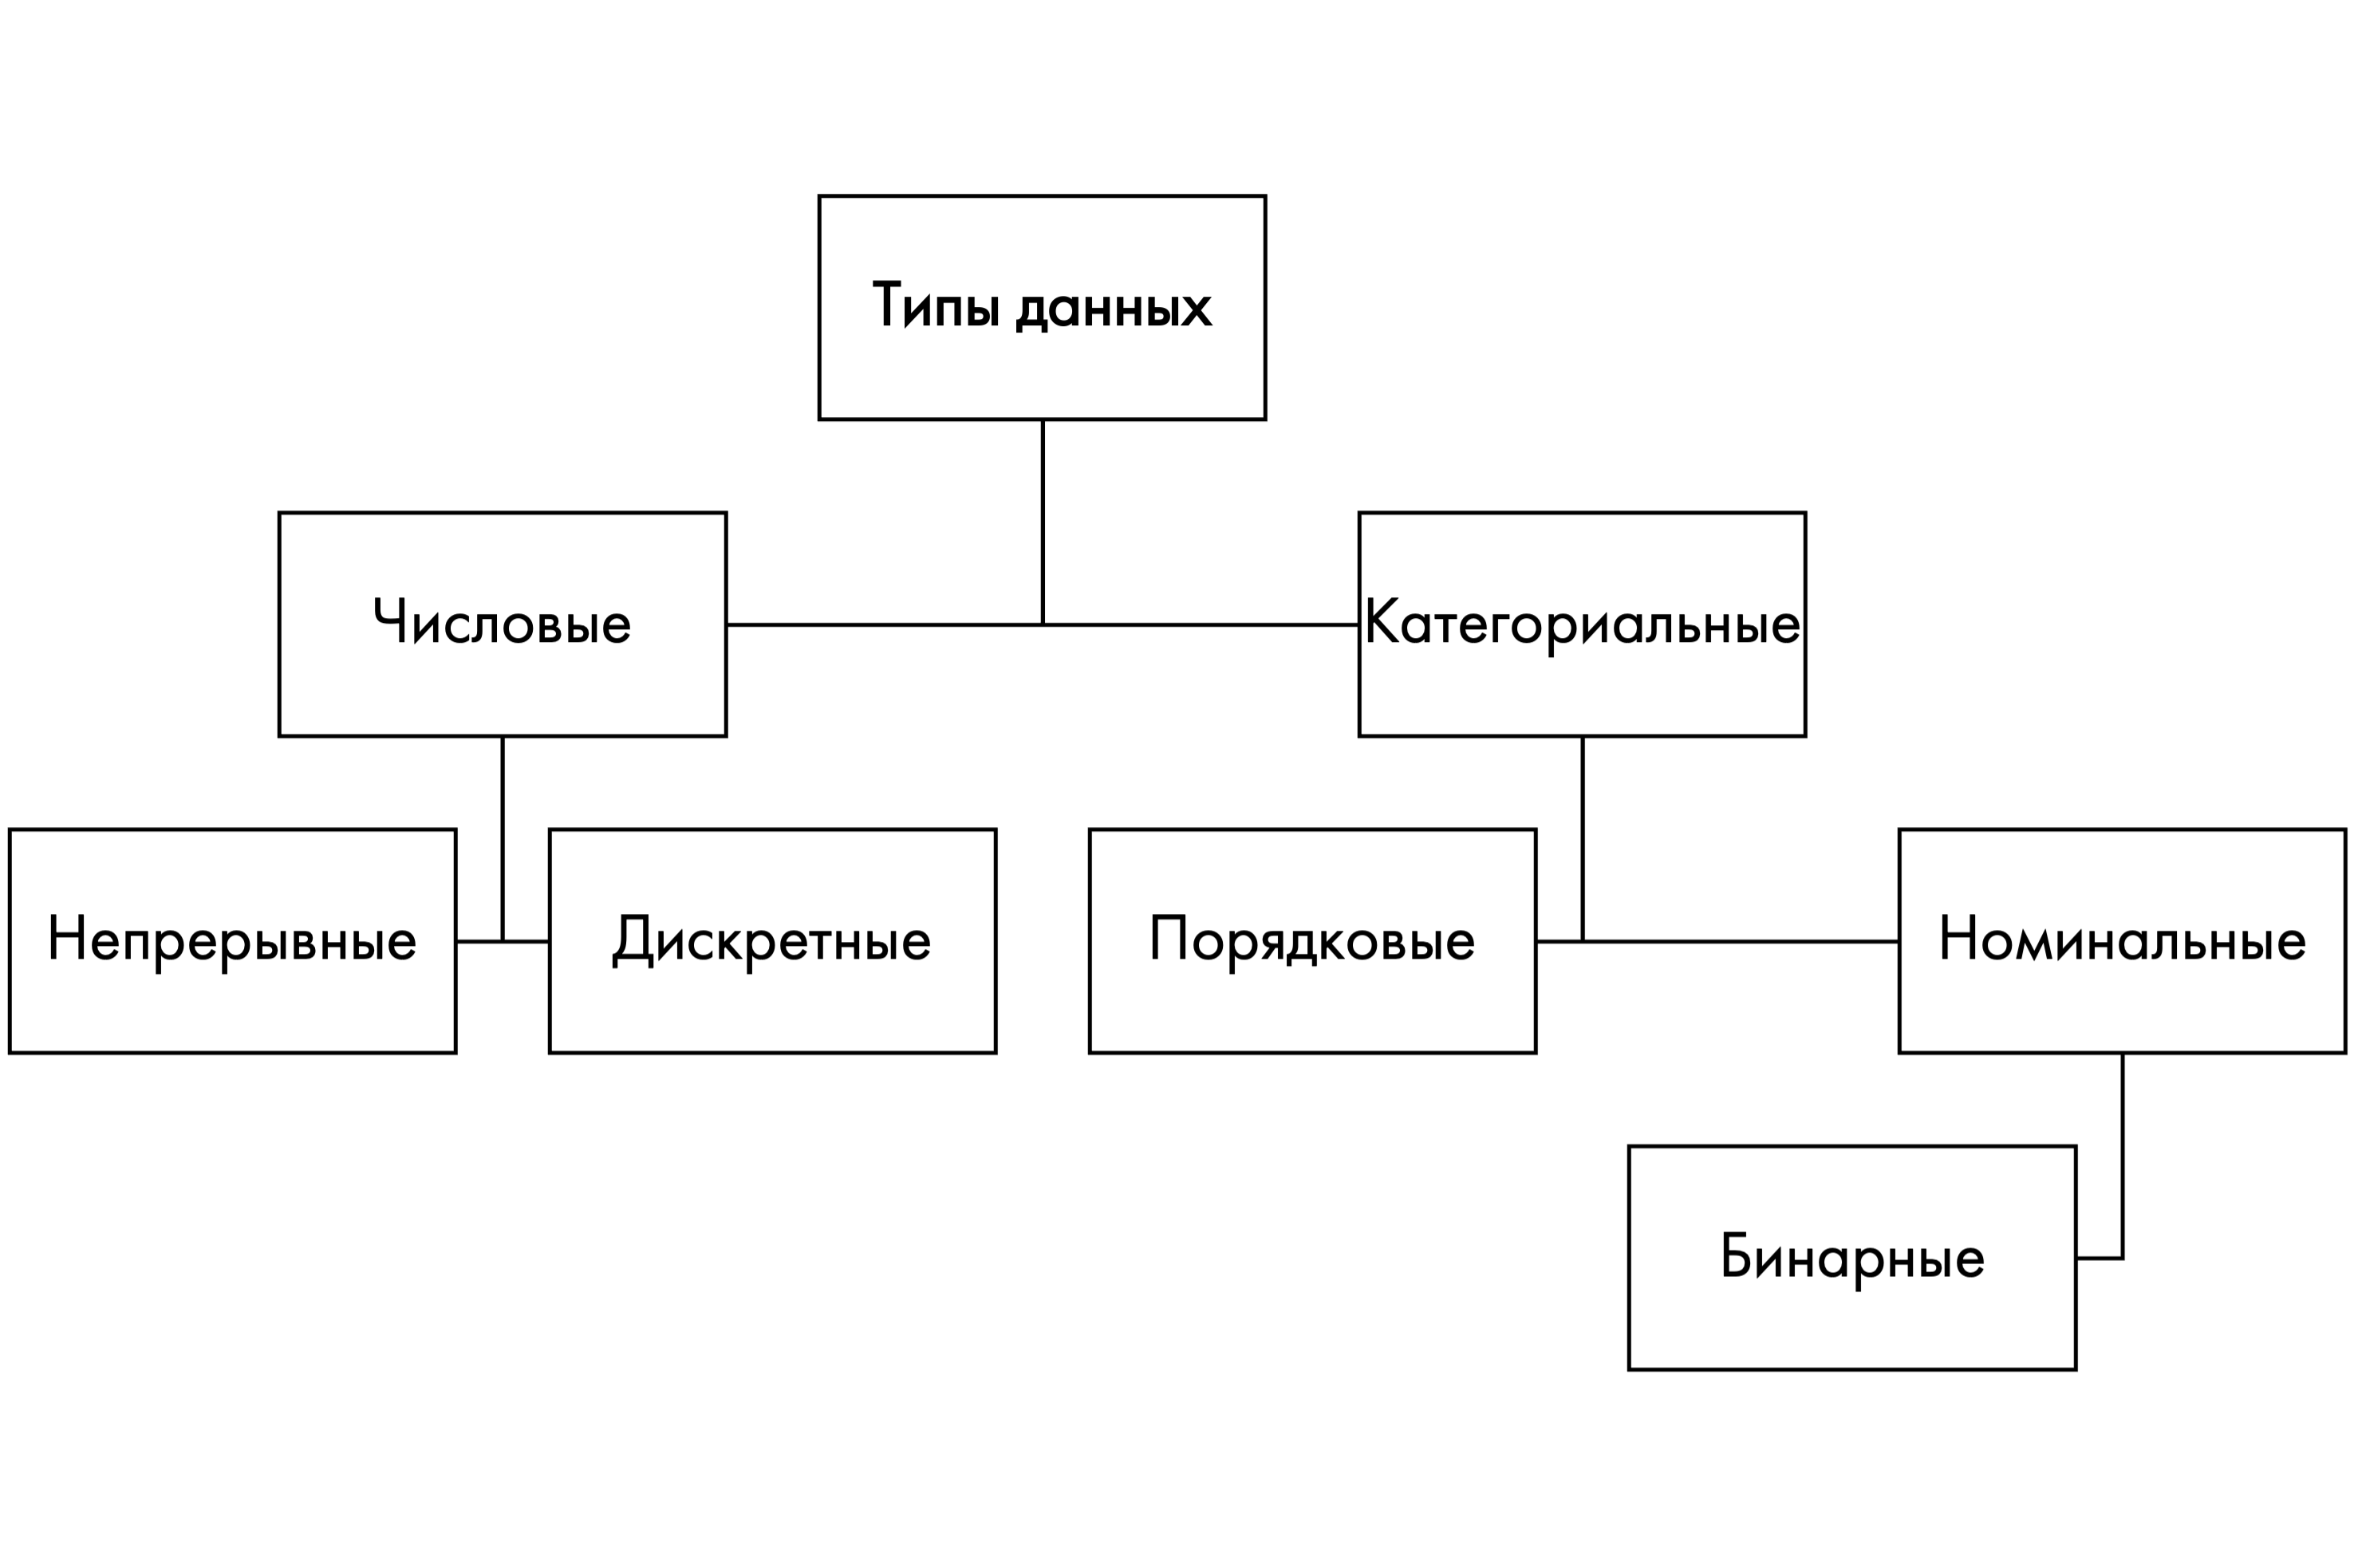">
    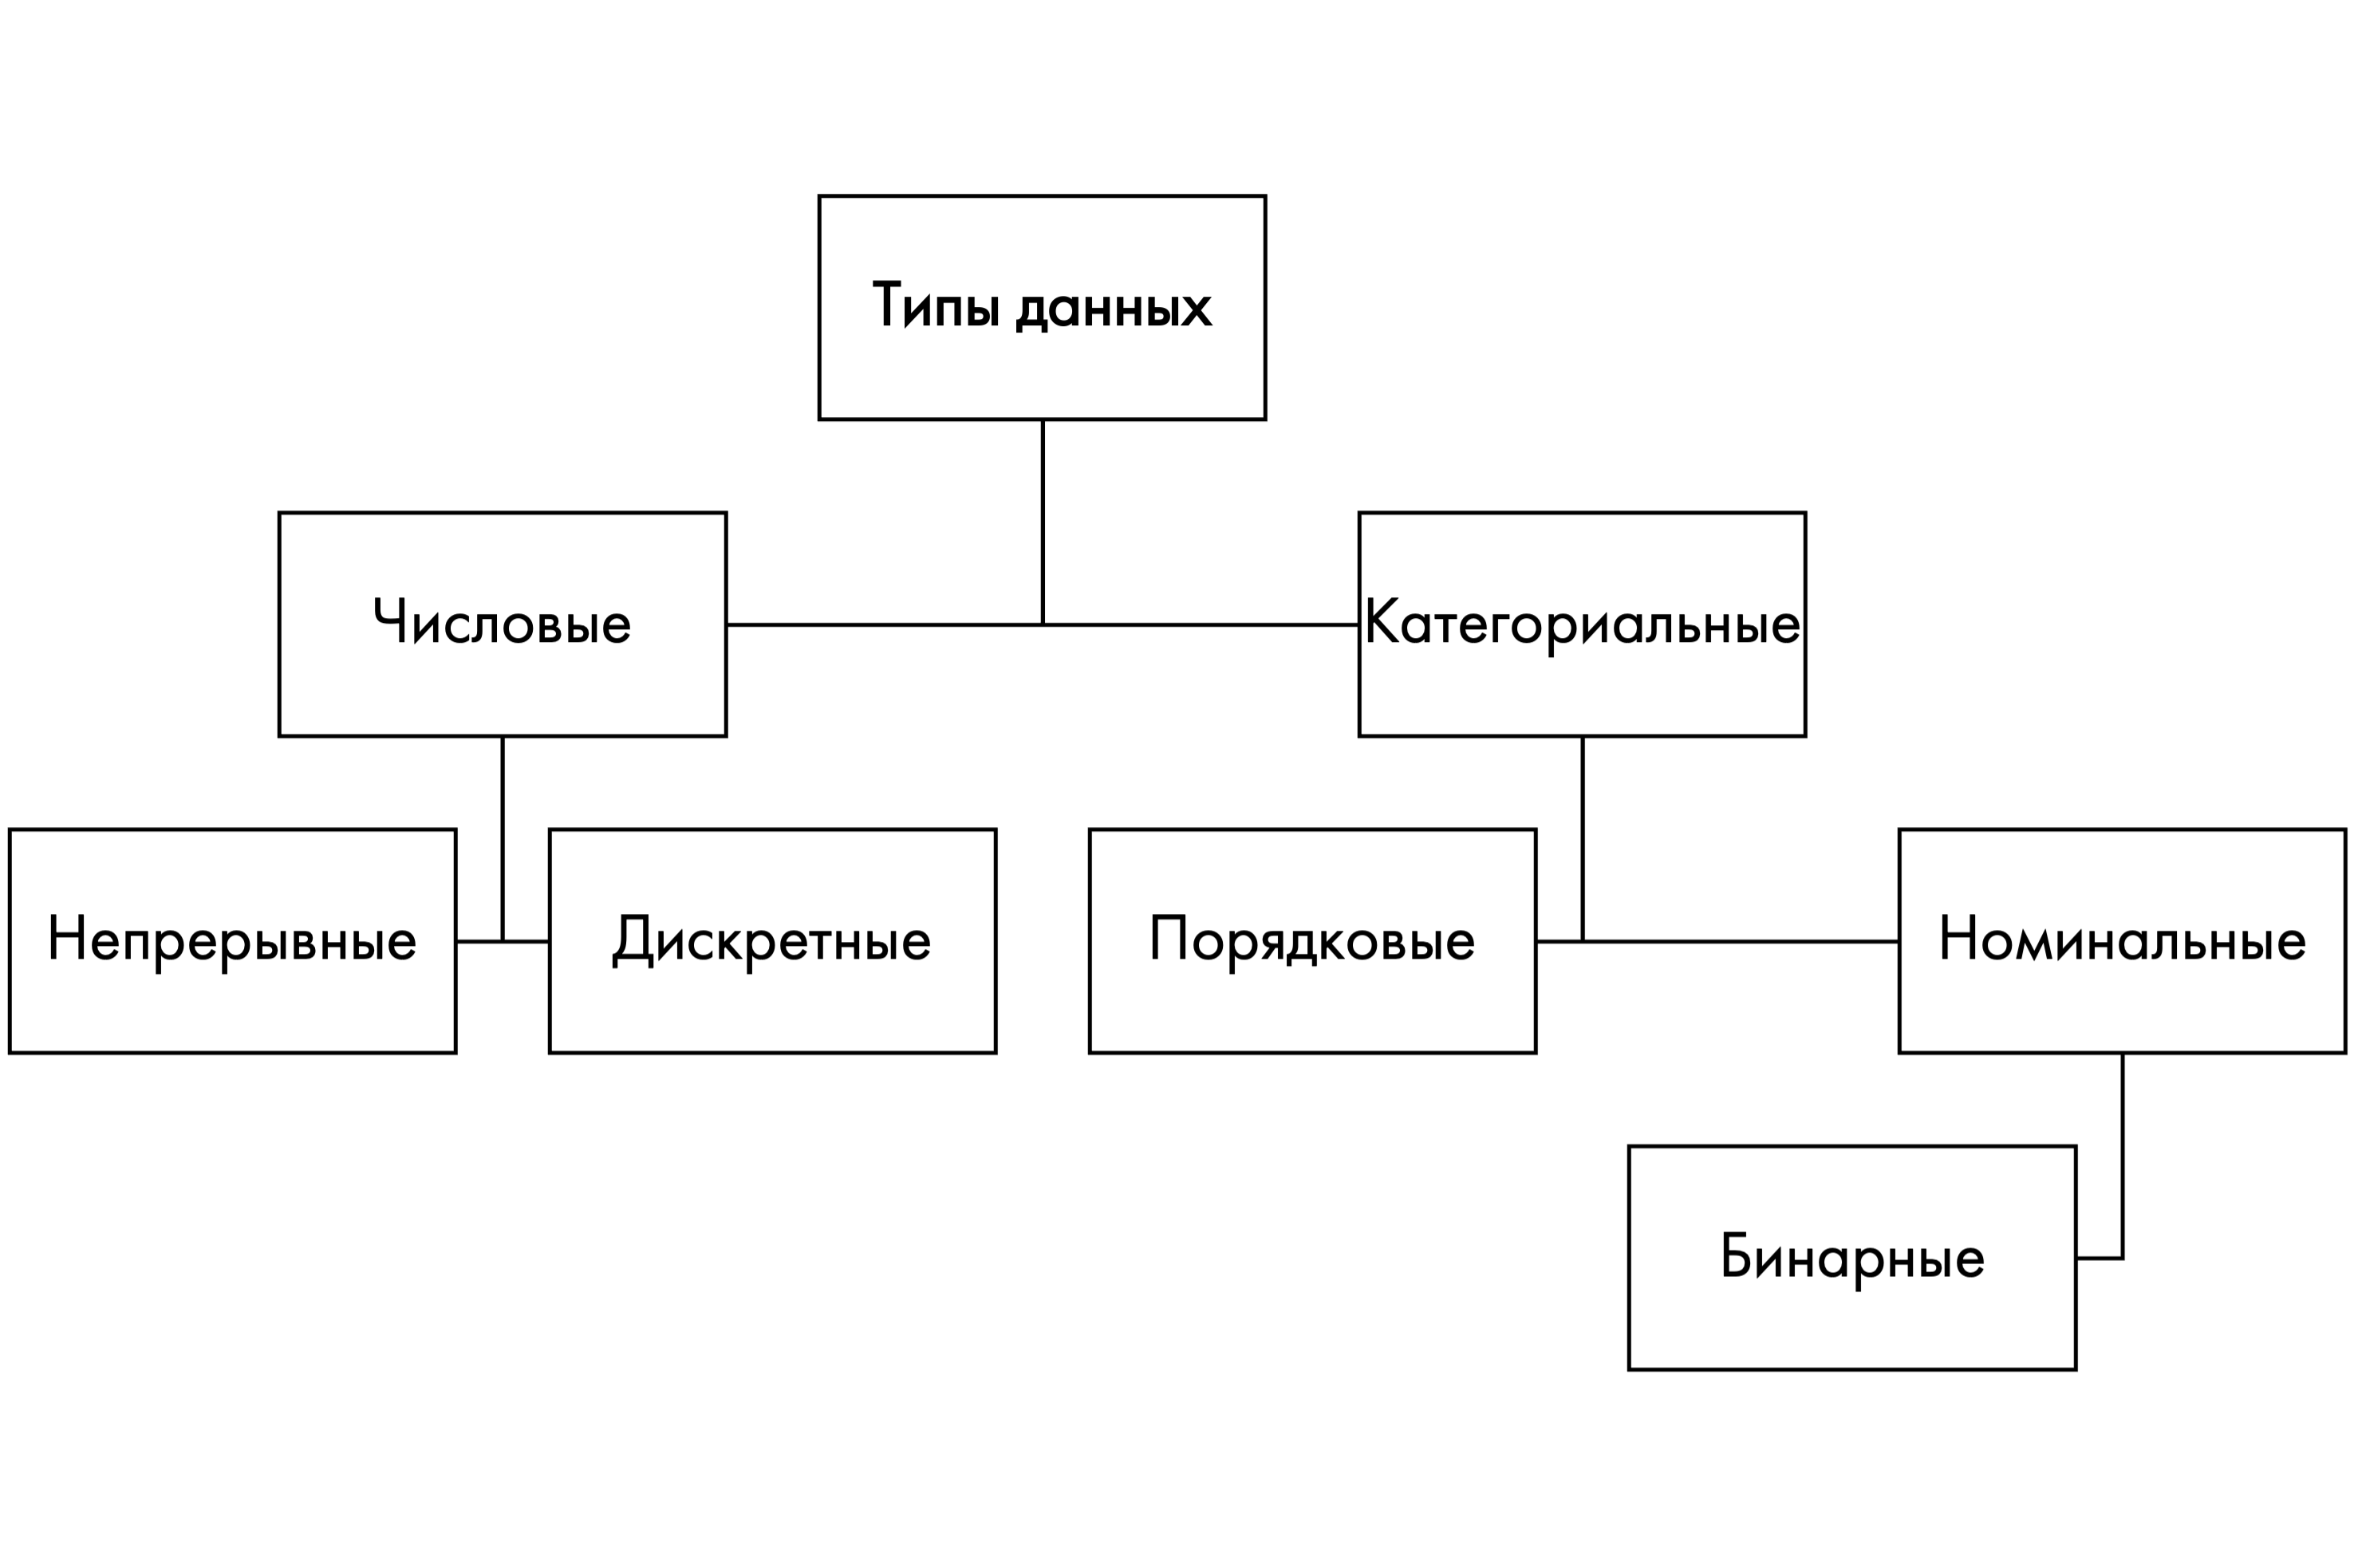
</a>
</div>

* <b> Числовые (количественные)</b>:
    + <b>Непрерывная</b> – могут принимать вещественные значения 
    + <b>Дискретная </b> - могут быть только целыми, принимать определенные значения (например, количество студентов в классе)
* <b>Категориальная* </b> – переменная с ограниченным числом уникальных значений или категорий (например, вероисповедание, уровень образования). Важно понимать, что числа, значения которых принимает категориальная переменная, не имеют такой же математической интерпретации, как у числовых переменных. <i>Делятся на</i>: 
    + <b>Порядковые (ранговые)</b> -  когда ее значения представляют категории с некоторым естественным для них упорядочением, например, уровни удовлетворенности обслуживанием от крайней неудовлетворенности до крайней удовлетворенности (или уровень образования)
    + <b>Номинальные</b> - когда ее значения представляют категории без естественного упорядочения. Примеры номинальных переменных включают регион, почтовый индекс или вероисповедание.
    + - <b>Бинарная</b> – принимает только два значения (0 и 1). Пример – статус работы респондента (вопрос опроса, на который ответ "Да" или "Нет")

Разница между <b>ранговой</b> и <b>дискретной</b> (бывают задания без уточнения):

Ранговая – обязательно <i>проранжированные</i> значения (например, "класс квартиры от 1 до 5"). Дискретная – набор значений с каким-то конкретным шагом (например, количество комнат в квартире – 1,2,3,4,5,6...,n)


<b>*</b> является дискретной, но не любая дискретная = категориальная

[Задания A3](https://edu.hse.ru/mod/quiz/view.php?id=1168825)

## **Выборка и генеральная совокупность**

Немного теории:

- **Генеральная совокупность** — это совокупность всех объектов, которые представляют интерес в конкретном исследовании.

- **Выборка** — это группа объектов, отобранных из генеральной совокупности для исследования.

- **Репрезентативность** — соответствие характеристик выборки характеристикам генеральной совокупности.

- **Ошибка выборки**  — 'естественное' несоответствие между характеристиками генеральной совокупности и характеристиками выборки. Наблюдается, даже если выборка репрезентативна.

- **Смещение выборки** - явление, при котором статистические характеристики выборки сильно отличаются (смещены) относительно характеристик генеральной совокупности. Чаще встречается, когда выборка нерепрезентативна.

<b>NB!</b> Хорошая выборка должна отражать тенденции генеральной совокупности (должна быть репрезентативной и несмещенной)

<p align = 'justify'>Необходимо внимательно смотреть на предлагаемый исследовательский вопрос и отталкиваться от его формулировки.</p>

<p align = 'justify'>Чем шире исследовательский вопрос, тем "шире" должна быть выборка. Например, если мы хотим исследовать рынок недвижимости, то хорошо было бы взять цены на продажи квартир за несколько лет по разным городам. Однако, если мы хотим исследовать московский рынок недвижимости за период с 2005 по 2010 год, то наблюдения</p>

* за другие года
* из других городов
<p align = 'justify'>нам не подойдут.</p>

## Гистограммы и столбчатые диаграммы

[Задания A7](https://edu.hse.ru/mod/quiz/view.php?id=1156118&forceview=1) 

In [67]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Гистограммы для непрерывных величин

**Гистограмма** — помогает нам увидеть **частоту значений в некоторых диапазонах** (их еще называют "бинами" или "интервалами"). Иначе говоря, гистограмма показывает показывает распределение данных по интервалам. Гистограммы используются для визуализации распределения **непрерывных** (и редко дискретных) величин.

**Пример**: распределение температур в течение месяца.
- **Шаг 1 - собираем данные** (у нас они обычно уже есть). Мы собрали данные о температурах в течение месяца. Например, каждую неделю мы записывали, какая температура была в каждый день
- **Шаг 2 - разделение на группы**. Чтобы построить гистограмму, мы сначала делим все температуры на группы. Например, мы можем сделать группы по интервалам (бинам, диапазонам): 0-5°C, 6-10°C, 11-15°C и так далее
- **Шаг 3 - посчитываем "попадания" в каждый интервал**. В нашем случае - подсчитываем, сколько температур попадает в каждую группу. Например, температура "0-5°C" длилась 9 дней, то есть в эту группу попало 9 температур и т.д.
- **Шаг 4 - построение гистограммы**. На горизонтальной оси (OX) пишем наши группы температур (0-5°C, 6-10°C, и т.д.). На вертикальной оси (OY) пишем количество дней для каждой группы. И после рисуем столбцы: для каждой группы температур рисуем *столбец, высота которого соответствует количеству дней, когда температура была в этом интервале*.

In [68]:
np.random.seed(0)
temperatures = np.random.randint(0, 30, 100)
temperatures

array([12, 15, 21,  0,  3, 27,  3,  7,  9, 19, 21, 18,  4, 23,  6, 24, 24,
       12, 26,  1,  6,  7, 23, 14, 24, 17,  5, 25, 13,  8,  9, 20, 19, 16,
       19,  5, 15, 15,  0, 18,  3, 24, 17, 19, 29, 19, 19, 14,  7,  0,  1,
        9, 25,  0, 10, 20, 23,  3, 11, 18, 23, 28,  2,  0,  0,  4, 21,  5,
        6,  8, 20, 17, 15,  4,  9, 10, 26, 24,  1,  1,  7,  9, 25,  3,  6,
       23, 11, 14, 18, 27,  0, 14,  3, 21, 12, 25, 10, 20, 11,  4])

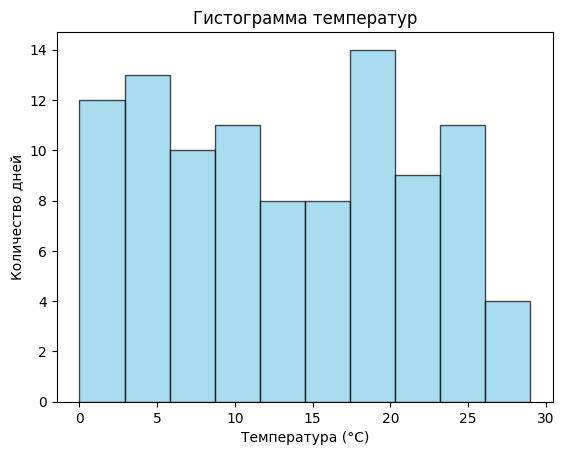

In [69]:
plt.hist(temperatures, bins=10, edgecolor='black', color='skyblue', alpha=0.7)
plt.title('Гистограмма температур')
plt.xlabel('Температура (°C)')
plt.ylabel('Количество дней');

### 2. Столбчатая диаграмма для дискретных или категориальных величин

**Столбчатая диаграмма** — помогает нам увидеть, *как часто* встречается *каждая* из *категорий* или *отдельных (дискретных) значений*. Столбчатые диаграммы используются для визуализации распределения **дискретных величин** или **категорий**.

В отличие от гистограммы, где данные делятся на интервалы (или "бины"), в столбчатой диаграмме данные представлены в виде отдельных категорий или дискретных значений **без интервалов**. 

⭐️**TIP**⭐️ Отличить столбчатую диаграмму от гистограммы можно по наличию (или отсутствую) "пробела" между столбцами. *В столбчатой диаграмме столбцы отделены друг от друга*, что указывает на *независимость категорий* (или дискретность значений). В гистограмме столбцы соединены, что показывает непрерывность диапазонов значений.

**Пример**: распределение оценок (4-10) студентов.

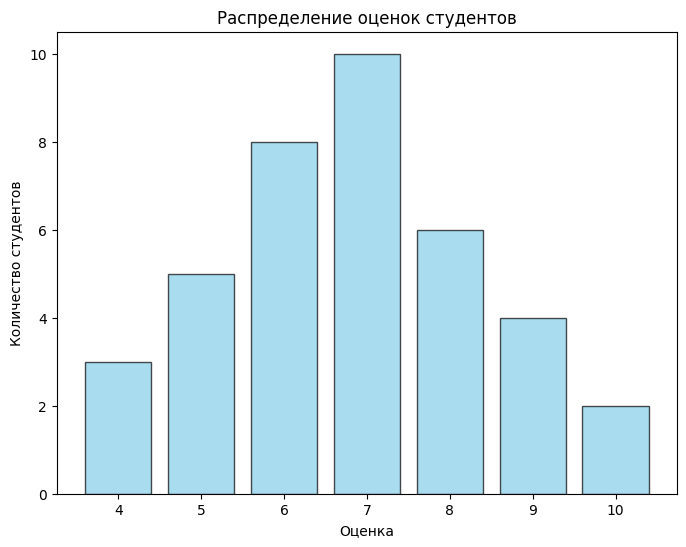

In [70]:
# Оценки студентов
grades = [4, 5, 6, 7, 8, 9, 10]
# Количество студентов, получивших каждую оценку
counts = [3, 5, 8, 10, 6, 4, 2]

plt.figure(figsize=(8, 6))
plt.bar(grades, counts, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Распределение оценок студентов')
plt.xlabel('Оценка')
plt.ylabel('Количество студентов');

### 3. Сравнение столбчатой диаграммы и гистограммы:

| **Характеристика**             | **Столбчатая диаграмма**                     | **Гистограмма**                              |
|--------------------------------|----------------------------------------------|----------------------------------------------|
| **Тип столбцов**               | Столбцы **не сомкнуты** (отдельные категории)| Столбцы **сомкнуты** (без промежутков)       |
| **Разбиение данных**           | Данные **не разбиты** на интервалы           | Данные **разбиты** на интервалы               |
| **Тип данных**                 | Используется для **дискретных категорий** или **уникальных значений** | Используется для **непрерывных** (и иногда **дискретных**) величин |


❗️NOTE❗️

В заданиях A7 иногда пишут про гистограмму для дискретных величин. На самом деле гистограмму для дискретных величин построить можно, просто объединив их в интервалы. На примере со студентами - мы можем объединить оценки в интервалы (4-6), [6-8), [8-10) - тогда каждая дискретная оценка станет частью интервала и границы между ними "сотрутся". То есть столбцы перестанут быть сомкнутыми и получится гистограмма. 

Тем не менее сейчас в демках A7 столбчатые диаграммы называют гистограммами. Это не совсем правильно, но на ваш ответ повлиять не должно. Если встретится такой кейс - просто примите и простите 🙂

## **Фильтрация данных** <a name="part4"></a>

Фильтрация данных в pandas — это способ выбрать только те строки из DataFrame, которые соответствуют определенным **условиям**

### 1. Фильтрация по одному условию

**Синтаксис**

```python
    датафрейм[датафрейм['признак'] ==/!=/</<=/>/>= значение]
```

Где `датафрейм['признак'] ==/!=/</<=/>/>= значение` - **условие**

In [71]:
# Посмотрим на то, как выглядит условие (типа Bool Series)
data['Sex'] == 'female'

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888     True
889    False
890    False
Name: Sex, Length: 891, dtype: bool

In [72]:
data['Sex'] == 'female'

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888     True
889    False
890    False
Name: Sex, Length: 891, dtype: bool

In [73]:
data[data['Sex'] == 'female']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Условие `data['Sex'] == 'female'` - это так называемый Bool Series. Он создается с теми же индексами, что и изначальный датафрейм `data`. Каждый элемент этого массива равен **True**, если значение в соответствующей строке столбца Sex равно female (условие выполняется), и **False** в противном случае (условие не выполняется).

In [74]:
# сделаем фильтрацию датафрейма по условию выше
# выведутся только строки, соответствующие female
data[data['Sex'] == 'female']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [75]:
# можно записать условие в отдельную переменную
condition = data['Sex'] == 'female'
data[condition]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [76]:
# Фильтрация по возрасту - выводим людей старше 50 лет
condition = data['Age'] > 50
data[condition]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
...,...,...,...,...,...,...,...,...,...,...,...,...
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S


### 2. Несколько условий

Для фильтрации данных по нескольким условиям нужно просто следовать следующей мантре:

1. **Использование побитовых операторов** (не бойтесь этого слова - это просто символы, которые математики назвали страшным словом, чтобы пугать народ)
    - **`&`** (апперсант) - эквивалент **логического И**, **`and`**. Используется для условий, которые должны быть *одновременно* истинными
    - **`|`** - эквивалент **логического ИЛИ**, **`or`**. Используется для условий, где *достаточно, чтобы одно из них было истинным*
    - **`~`** (тильда) - эквивалент **отрицания**, **`not`**. Используется для отрицания условия

2. **Использование скобок**
    - Всегда используйте скобки вокруг каждого условия! С помощью них пандас понимает, что с чем мы хотим объединить. Если не поставите скобки - пандас заругается!
    - Внутри скобок указывайте условия, а за пределами скобок объединяйте их с помощью побитовых операторов (`&`, `|`, `~`)

**Синтаксис**

```python
    датафрейм[(условие_1) & или | или ~ (условие_2) ...]
```

In [77]:
# 1. Два условия - выводим Женщин (условие 1) старше 30 лет (условие два)
data[(data["Sex"] == 'female') & (data["Age"] > 30)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [78]:
# Можем вывести и другим образом, записав условия в переменные
condition_1 = data["Sex"] == 'female'
condition_2 = data["Age"] > 30
data[condition_1 & condition_2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [79]:
data[condition_1 and condition_2]  # будет ошибка

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Обратите внимание, что во втором случае не обязательно писать скобки, потому что пандасу как бы "нечего путать". А в первом случае, без записи условий в переменные, если мы забудем поставить скобки над каждым условием, пандам захочет объединить `female` и `data["Age"]`, что сделать никак нельзя (и что не следует нашим изначальным желаниям):

In [83]:
data[data["Sex"] == 'female' & data["Age"] > 30]

TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]

Поэтому мой совет - просто ставьте всегда скобки над условиями, чтобы не путаться. Вне зависимости от того, используете ли вы фильтрацию сразу или пишите условия в отдельные переменные. 

In [80]:
# 2. Фильтрация по трем условиям: выводим женщин (условие 1) из класса 1 (условие 2) или из класса 2 (условие 3)
condition_1 = data["Pclass"] == 1
condition_2 = data["Pclass"] == 2
condition_3 = data["Sex"] == 'female'

data[((condition_1) | (condition_2)) & (condition_3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [81]:
# 3. Фильтрация по четырем условиям - девушки (условие 1) от 18 лет (условие 2)
# севшие в порту Cherbourg(С) (условие 3), или Southampton (S) (условие 4)

cond1 = data['Sex'] == 'female'
cond2 = data['Age'] > 18
cond3 = (data['Embarked'] =='S') | (data['Embarked'] =='C')

data[cond1 & cond2 & cond3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S


In [82]:
# 4. Фильтрация по пяти условиям: девушки (условие 1) от 18 до 25 (условие 2 и 3), 
# путешествующие в одиночку (без каких-либо родственников) - условия 4 и 5
data[(data['Sex'] == 'female') & (data['Age'] > 18) & (data['Age'] < 25) &
     (data['SibSp'] == 0) & (data['Parch'] == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S
289,290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
293,294,0,3,"Haas, Miss. Aloisia",female,24.0,0,0,349236,8.8500,NaN,S
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.0000,F33,S
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C


### 3. Подсчет количества наблюдений после фильтрации `.shape`

In [83]:
data_filtered = data[
    (data['Sex'] == 'female') & 
    (data['Age'] > 18) & 
    (data.Age < 25) & 
    (data.SibSp == 0) & 
    (data.Parch == 0)
    ]

print(data_filtered.shape)      # размер датафрейма после фильтрации (число наблюдений, число столбцов)
print(data_filtered.shape[0])   # число наблюдений после фильтрации

(25, 12)
25


## **Сортировка данных** `.sort_values()` <a name="part5"></a>

In [84]:
data.sort_values(by='Age').head(10)             # сортируем по возрасту, по умолчанию сортирвка по возрастанию

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S


In [85]:
data.sort_values(by='Age', ascending=False)     # сортируем по возрасту, теперь по убыванию

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [86]:
data.sort_values(by=['Age', 'Fare'], ascending=False).head()    # сортируем сперва по возрасту (по убыванию),
                                                                # потом по стоимости билета  (по убыванию)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [87]:
data.sort_values(by=['Age', 'Fare'], ascending=[False, True]).head()    # сортируем сперва возрасту (по убыванию),
                                                                        # потом по стоимости билета  (по возрастанию)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


## **Удаление повторений** `.drop_duplicates()`

In [88]:
df1 = pd.DataFrame()
df1["Блогер"] = ['Катя', 'Иван', 'Катя', 'Мария']
df1["Подписчики"] = [1500, 2300, 1500, 1200]
df1

,Блогер,Подписчики
0,Катя,1500
1,Иван,2300
2,Катя,1500
3,Мария,1200


In [89]:
df1.drop_duplicates()

,Блогер,Подписчики
0,Катя,1500
1,Иван,2300
3,Мария,1200


In [90]:
df2 = pd.DataFrame()
df2["Блогер"] = ['Катя', 'Иван', 'Катя', 'Мария']
df2["Подписчики"] = [1500, 2300, 1600, 1200]        # Теперь у Кати два различных значения количества ее подписчиков
df2

,Блогер,Подписчики
0,Катя,1500
1,Иван,2300
2,Катя,1600
3,Мария,1200


In [91]:
df2.drop_duplicates()       # Так остается две записи с числом подписчиков Кати

,Блогер,Подписчики
0,Катя,1500
1,Иван,2300
2,Катя,1600
3,Мария,1200


In [92]:
# Удаляем дубликаты по столбцу - так на Катю теперь приходится одна запись
df2.drop_duplicates('Блогер')

,Блогер,Подписчики
0,Катя,1500
1,Иван,2300
3,Мария,1200


In [93]:
df2.drop_duplicates('Блогер', ignore_index=True)    # С помощью 'ignore_index'=True можно сделать индексы новыми, 
                                                    # от 0 до n (n - число записей в удаленной от дубликатов таблице)

,Блогер,Подписчики
0,Катя,1500
1,Иван,2300
2,Мария,1200


In [94]:
df2.drop_duplicates('Блогер', keep='last')      # Можно сохранять не первое вхождение 'дубликата', а последнее

,Блогер,Подписчики
1,Иван,2300
2,Катя,1600
3,Мария,1200


In [95]:
df2.drop_duplicates(['Блогер', 'Подписчики'])   # Можно удалять дубликаты по нескольким столбцам

,Блогер,Подписчики
0,Катя,1500
1,Иван,2300
2,Катя,1600
3,Мария,1200
